<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Tidying-data" data-toc-modified-id="Tidying-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tidying data</a></span><ul class="toc-item"><li><span><a href="#Data-inspection" data-toc-modified-id="Data-inspection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data inspection</a></span></li><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handle missing values</a></span></li><li><span><a href="#Visualize-data" data-toc-modified-id="Visualize-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualize data</a></span></li><li><span><a href="#Relationship-between-variables" data-toc-modified-id="Relationship-between-variables-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Relationship between variables</a></span></li></ul></li><li><span><a href="#5-Model" data-toc-modified-id="5-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>5 Model</a></span></li><li><span><a href="#2a)-Model-with-all-predictors" data-toc-modified-id="2a)-Model-with-all-predictors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2a) Model with all predictors</a></span></li><li><span><a href="#2.-b)-Update-Model" data-toc-modified-id="2.-b)-Update-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2. b) Update Model</a></span></li><li><span><a href="#2c)-Predict" data-toc-modified-id="2c)-Predict-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2c) Predict</a></span></li><li><span><a href="#2.-d)-Confusion-Matrix-&amp;-Metrics" data-toc-modified-id="2.-d)-Confusion-Matrix-&amp;-Metrics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2. d) Confusion Matrix &amp; Metrics</a></span></li><li><span><a href="#2.-e)-Use-Train-&amp;-Test-for-modelling-and-evaluation" data-toc-modified-id="2.-e)-Use-Train-&amp;-Test-for-modelling-and-evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>2. e) Use Train &amp; Test for modelling and evaluation</a></span></li></ul></div>

**Applied Statistics**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, fisher_exact
from sklearn.model_selection import train_test_split

Name:

Surname:

# Assignment 4: Logistic Regression 

**Data Description:**

The World Happiness Report ranks 156 countries by their happiness levels (`Happiness.Score`). The rankings come from the Gallup World Poll and are based on answers to the main life evaluation question asked in the poll. This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2013-2015. They are based entirely on the survey scores, using the Gallup weights to make the estimates representative. 

The other variables in the dataset show the estimated extent to which each of the factors contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the factors (for more information about the data, visit this [FAQ-site](https://s3.amazonaws.com/happiness-report/2016/FAQ_2016.pdf) or the [World Happiness Report-site](http://worldhappiness.report/ed/2016/)).

**Task Description**

In this assignment, we analyse the relationship between the country specific happiness and some predictor variables. In particular, we want to classify which countries are likely to be "happy". 


* Data preparation:

  - 1.1 Rename the variables in the DataFrame to 'Country', 'Happiness_Score', 'Economy', 'Family', 'Health' and 'Trust'

  - 1.2 Create a new categorical variable called `Happy`, where all countries with a Happiness_Score > 5.5 are labeled with 'Yes', otherwise 'No'.  
    
  - 1.3 Delete the variable `Happiness_Score` and change the data types if necessary (categorical, float, integer...).

  - 1.4 Visualize the distributions of the numerical variables in a histogram: display the distributions of the two groups (Happy: 'Yes' and 'No') in every histograms.  
    
  - 1.5 Visualize the distributions of the numerical variables in a bosxplot: compare the distributions of the two groups (Happy: 'Yes' and 'No') for every variable. 
    
    
* 2. Logistic regression model:

* 2. a) Fit a logistic regression model with all predictor variables (response: `Happy`; predictors: `Economy`, `Family`, `Health` and `Trust`).  

* 2. b) Please explain wether you would recommend to exclude a predictor variable from your model (from task 2a)). Update your model if necessary.

* 2. c) Use your updated model and predict the probability that a country has "Happy" inhabitants. Classify a happy country as "happy"  (with label 'Yes') if the predicted probability of the happiness exceeds:

    - c1): 0.4 (i.e. threshold = 0.4) 
    - c2): 0.5 (i.e. threshold = 0.5)
    - c3): 0.7 (i.e. threshold = 0.7). 
    
    Otherwise classify the country as non-happy (with label 'No').


  * 2. d) Compute the confusion matrix for every threshold (c1), c2) and c3)) in order to determine how many observations were correctly or incorrectly classified. Furthermore, use the results from the confusion matrix and create the following variables: true positive; true negative; false positive and false negative. Use these variables to calculate the following measures: "Accuracy", Precision" (what proportion of positive identifications was actually correct?), "Recall" (what proportion of actual positives was identified correctly) and the F1 score (measure of a test's accuracy) for the thresholds in c1), c2) and c3). Which threshold would you recommend? 

Hints: **Precision** is defined as the number of true positives over the number of true positives plus the number of false positives. **Recall** is defined as the number of true positives over the number of true positives plus the number of false negatives. These two quantities are related to the **F1 score**, which is defined as the harmonic mean of precision and recall: $F1 = 2* ((Precision * Recall)/(Precision + Recall)).$

* 2. e) Fit the logistic regression model using a training data set. Compute the confusion matrix and accuracy for the held out data (test data size = 30%). Use a threshold of 0.7.

---



Data Source: 

Helliwell, J., Layard, R., & Sachs, J. (2016). World Happiness Report 2016, Update (Vol. I).
New York: Sustainable Development Solutions Network.



## Import data

In [3]:
# Load the csv data files into pandas dataframes
PATH = '/Users/jankirenz/Dropbox/Data/' 
df = pd.read_csv(PATH + 'report_16.csv')

## Tidying data

### Data inspection

First of all, let's take a look at the variables (columns) in the data set.

In [4]:
# show all variables in the data set
df.columns

Index(['Unnamed: 0', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.',
       'Family', 'Health..Life.Expectancy.', 'Trust..Government.Corruption.'],
      dtype='object')

In [5]:
# Drop variables
df = df.drop('Unnamed: 0', axis=1)

In [6]:
# Change variable names
df.columns = ['Country', 'Happiness_Score', 'Economy', 'Family', 'Health', 'Trust']
df.head()

,Country,Happiness_Score,Economy,Family,Health,Trust
0,Denmark,7.526,1.44178,1.16374,0.79504,0.44453
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203
2,Iceland,7.501,1.42666,1.18326,0.86733,0.14975
3,Norway,7.498,1.57744,1.12690,0.79579,0.35776
4,Finland,7.413,1.40598,1.13464,0.81091,0.41004


In [7]:
df.Happiness_Score.mean()

5.382184713375795

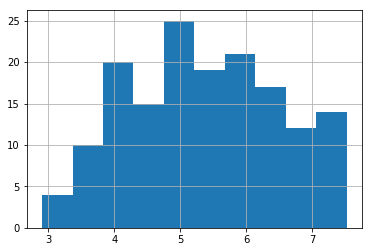

In [9]:
df.Happiness_Score.hist()

In [8]:
df.Happiness_Score.median()

5.314

In [10]:
# Create 
df['Happy'] = np.where(df['Happiness_Score']>5.5, 'Yes', 'No')

In [12]:
df.tail(5)

,Country,Happiness_Score,Economy,Family,Health,Trust,Happy
152,Benin,3.484,0.39499,0.10419,0.21028,0.06681,No
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.07112,No
154,Togo,3.303,0.28123,0.00000,0.24811,0.11587,No
155,Syria,3.069,0.74719,0.14866,0.62994,0.17233,No
156,Burundi,2.905,0.06831,0.23442,0.15747,0.09419,No


In [13]:
df.Happy.value_counts()

No     84
Yes    73
Name: Happy, dtype: int64

In [14]:
df = df.drop('Happiness_Score', axis=1)

In [15]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
Country    157 non-null object
Economy    157 non-null float64
Family     157 non-null float64
Health     157 non-null float64
Trust      157 non-null float64
Happy      157 non-null object
dtypes: float64(4), object(2)
memory usage: 7.4+ KB


In [16]:
# Change data types
df['Country'] = df['Country'].astype('category')
df['Happy'] = df['Happy'].astype('category')

In [17]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(5)

,Country,Economy,Family,Health,Trust,Happy
0,Denmark,1.44178,1.16374,0.79504,0.44453,Yes
1,Switzerland,1.52733,1.14524,0.86303,0.41203,Yes
2,Iceland,1.42666,1.18326,0.86733,0.14975,Yes
3,Norway,1.57744,1.12690,0.79579,0.35776,Yes
4,Finland,1.40598,1.13464,0.81091,0.41004,Yes


### Handle missing values

In [19]:
print(df.isnull().sum())

Country    0
Economy    0
Family     0
Health     0
Trust      0
Happy      0
dtype: int64


# Task 1) Exploratory Data Analysis

### Visualize data

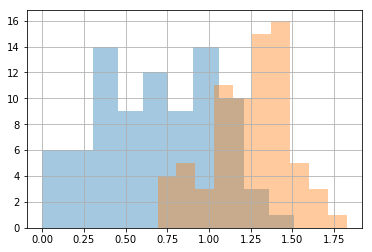

In [151]:
df.groupby('Happy').Economy.hist(alpha=0.4);

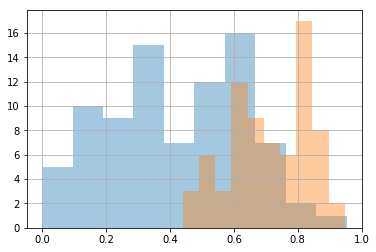

In [152]:
df.groupby('Happy').Health.hist(alpha=0.4);

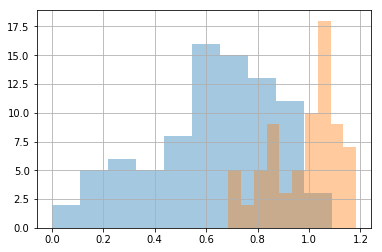

In [153]:
df.groupby('Happy').Family.hist(alpha=0.4);

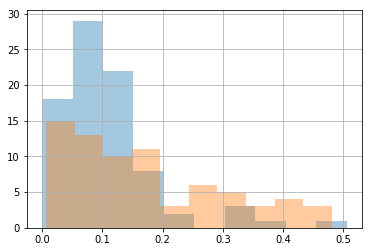

In [154]:
df.groupby('Happy').Trust.hist(alpha=0.4);

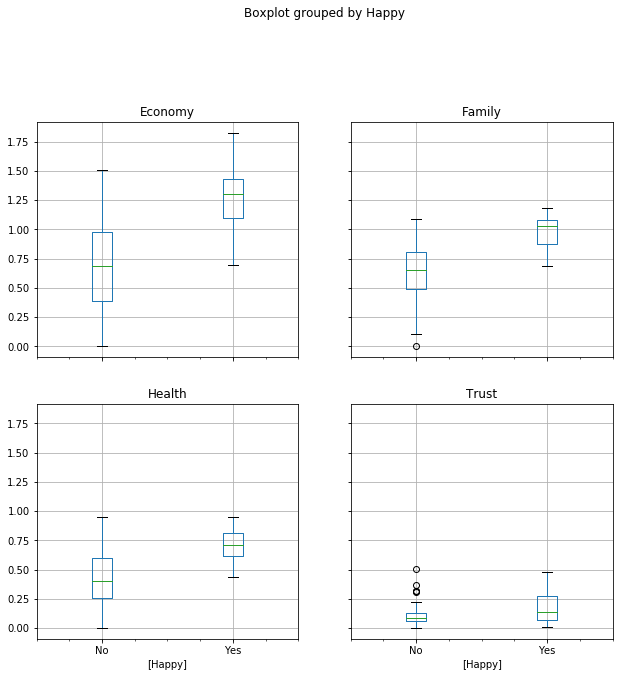

In [155]:
df.boxplot(by='Happy', layout=(4, 2), figsize=(10,20));

### Relationship between variables

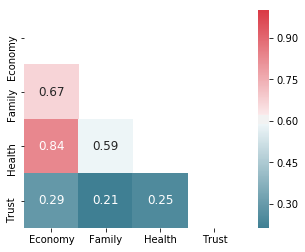

In [156]:
# Inspect relationship between variables (correlation)
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

## 5 Model

# 2) Logistic Regression

## 2a) Model with all predictors

In [31]:
X = df[['Economy', 'Family', 'Health', 'Trust']].copy()
# Statsmodel needs a constant added manually
X['Intercept'] = 1
X.head()

,Economy,Family,Health,Trust,Intercept
0,1.44178,1.16374,0.79504,0.44453,1
1,1.52733,1.14524,0.86303,0.41203,1
2,1.42666,1.18326,0.86733,0.14975,1
3,1.57744,1.12690,0.79579,0.35776,1
4,1.40598,1.13464,0.81091,0.41004,1


In [29]:
# Encode happy = 1 and not happy = 0. Convert to float, as statsmodel likes it like that.
y = pd.get_dummies(df['Happy'])
y = y['Yes'].astype('float')
y.head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Yes, dtype: float64

In [32]:
# Define and fit logistic regression model
logit = sm.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.284149
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  157
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            4
Date:                Tue, 22 Jan 2019   Pseudo R-squ.:                  0.5886
Time:                        12:58:31   Log-Likelihood:                -44.611
converged:                       True   LL-Null:                       -108.44
                                        LLR p-value:                 1.236e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Economy        2.7402      1.435      1.910      0.056      -0.072       5.552
Family         8.0509      2.021      3.984      0.000       4.090      12.012
Health         3.8342      2.371      1.617      0.106      -0.812       8.480
Trust          5.1377      3.726      1.379      0.168      -2.165      12.441
Intercept    -12.5255      2.163     -5.791      0.000     -16.764      -8.286
==============================================================================
"""

## 2. b) Update Model

In [33]:
# Define and fit logistic regression model
X = X.drop(X[['Trust','Health']], axis=1)
logit = sm.Logit(y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.298113
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                  157
Model:                          Logit   Df Residuals:                      154
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Jan 2019   Pseudo R-squ.:                  0.5684
Time:                        13:01:21   Log-Likelihood:                -46.804
converged:                       True   LL-Null:                       -108.44
                                        LLR p-value:                 1.708e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Economy        4.3753      1.113      3.932      0.000       2.194       6.556
Family         8.0976      1.922      4.212      0.000       4.330      11.865
Intercept    -11.4291      1.892     -6.042      0.000     -15.137      -7.722
==============================================================================
"""

## 2c) Predict

In [34]:
# Predict and join probabilty to original dataframe
df['Probability'] = logit.predict(X)
df.head()

,Country,Economy,Family,Health,Trust,Happy,Probability
0,Denmark,1.44178,1.16374,0.79504,0.44453,Yes,0.986648
1,Switzerland,1.52733,1.14524,0.86303,0.41203,Yes,0.989304
2,Iceland,1.42666,1.18326,0.86733,0.14975,Yes,0.987806
3,Norway,1.57744,1.12690,0.79579,0.35776,Yes,0.990027
4,Finland,1.40598,1.13464,0.81091,0.41004,Yes,0.980360


In [35]:
df.tail()

,Country,Economy,Family,Health,Trust,Happy,Probability
152,Benin,0.39499,0.10419,0.21028,0.06681,No,0.000142
153,Afghanistan,0.38227,0.11037,0.17344,0.07112,No,0.000142
154,Togo,0.28123,0.00000,0.24811,0.11587,No,0.000037
155,Syria,0.74719,0.14866,0.62994,0.17233,No,0.000952
156,Burundi,0.06831,0.23442,0.15747,0.09419,No,0.000098


In [36]:
# Use thresholds to discretize Probability
df['Threshold 0.4'] = np.where(df['Probability'] > 0.4, 'Yes', 'No')
df['Threshold 0.5'] = np.where(df['Probability'] > 0.5, 'Yes', 'No')
df['Threshold 0.6'] = np.where(df['Probability'] > 0.6, 'Yes', 'No')
df['Threshold 0.7'] = np.where(df['Probability'] > 0.7, 'Yes', 'No')
df.head(200)

,Country,Economy,Family,Health,Trust,Happy,Probability,Threshold 0.4,Threshold 0.5,Threshold 0.6,Threshold 0.7
0,Denmark,1.44178,1.16374,0.79504,0.44453,Yes,0.986648,Yes,Yes,Yes,Yes
1,Switzerland,1.52733,1.14524,0.86303,0.41203,Yes,0.989304,Yes,Yes,Yes,Yes
2,Iceland,1.42666,1.18326,0.86733,0.14975,Yes,0.987806,Yes,Yes,Yes,Yes
3,Norway,1.57744,1.12690,0.79579,0.35776,Yes,0.990027,Yes,Yes,Yes,Yes
4,Finland,1.40598,1.13464,0.81091,0.41004,Yes,0.980360,Yes,Yes,Yes,Yes
5,Canada,1.44015,1.09610,0.82760,0.31329,Yes,0.976972,Yes,Yes,Yes,Yes
6,Netherlands,1.46468,1.02912,0.81231,0.29927,Yes,0.964862,Yes,Yes,Yes,Yes
7,New Zealand,1.36066,1.17278,0.83096,0.41904,Yes,0.982379,Yes,Yes,Yes,Yes
8,Australia,1.44443,1.10476,0.85120,0.32331,Yes,0.978889,Yes,Yes,Yes,Yes
9,Sweden,1.45181,1.08764,0.83121,0.40867,Yes,0.976575,Yes,Yes,Yes,Yes


## 2. d) Confusion Matrix & Metrics

In [170]:
def print_metrics(df, predicted):
    # Header
    print('-'*50)
    print(f'Metrics for: {predicted}\n')
    
    # Confusion Matrix
    y_actu = pd.Series(df['Happy'], name='Actual')
    y_pred = pd.Series(df[predicted], name='Predicted')
    df_conf = pd.crosstab(y_actu, y_pred)
    display(df_conf)
    
    # Confusion Matrix to variables:
    pop = df_conf.values.sum()
    tp = df_conf['Yes']['Yes']
    tn = df_conf['No']['No']
    fp = df_conf['Yes']['No']
    fn = df_conf['No']['Yes']
    
    # Metrics
    accuracy = (tp + tn) / pop
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f'Accuracy:  {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall:    {recall:.4f}')
    print(f'F1 Score:  {f1_score:.4f} \n')

In [171]:
print_metrics(df, 'Threshold 0.4')
print_metrics(df, 'Threshold 0.5')
print_metrics(df, 'Threshold 0.6')
print_metrics(df, 'Threshold 0.7')

--------------------------------------------------
Metrics for: Threshold 0.4



Predicted,No,Yes
Actual,,
No,67,17
Yes,9,64


Accuracy:  0.8344
Precision: 0.7901
Recall:    0.8767
F1 Score:  0.8312 

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
No,73,11
Yes,13,60


Accuracy:  0.8471
Precision: 0.8451
Recall:    0.8219
F1 Score:  0.8333 

--------------------------------------------------
Metrics for: Threshold 0.6



Predicted,No,Yes
Actual,,
No,74,10
Yes,16,57


Accuracy:  0.8344
Precision: 0.8507
Recall:    0.7808
F1 Score:  0.8143 

--------------------------------------------------
Metrics for: Threshold 0.7



Predicted,No,Yes
Actual,,
No,78,6
Yes,16,57


Accuracy:  0.8599
Precision: 0.9048
Recall:    0.7808
F1 Score:  0.8382 



  - If we need the model to predict the purchasers to trigger a campaign that is very expensive and will only pay off if it's exposed to purchasers, and would have major negative effects, if exposed to a non-purchaser, then the precision would be crucial. Threshold 0.7.

  - If a model is needed, where it's important that I get a lot of the absolute true positives, and it doesn't matter a lot, and the true negatives are of no importance, then F-Score is a good metric. It's also often used as a metric for query results in information retrieval. The best F1-score is reached with Threshold 0.4
  
  - Accuracy is the ratio of correctly classified elements. This would be e.g. a good metric, if I want to target purchasers and non-purchasers with two different campaigns of medium impact in case of false classifications. Threshold 0.5 has the best score here.

  - The metric Recall takes only the true/false positives into account. It would be a good metric, if I want to target possible purchasers and don't worry a lot about false positives. The Threshold 0.4 would be right.

## 2. e) Use Train & Test for modelling and evaluation

In [172]:
# Split Dataset
train_X, test_X, train_y, test_y = train_test_split(X.copy(), y.copy(), test_size=0.3)
print(f'Trainingset size: {len(train_X)}')
print(f'Testingset size: {len(test_X)}')

Trainingset size: 109
Testingset size: 48


In [173]:
# Train logistic regression model with training set
logit = sm.Logit(train_y, train_X).fit()

Optimization terminated successfully.
         Current function value: 0.305953
         Iterations 8


In [174]:
# Predict test data
test_X['Probability'] = logit.predict(test_X)

In [177]:
# Calculate metrics
test_X['Happy'] = np.where(test_y == 1.0, 'Yes', 'No')  # Join actual values
test_X['Threshold 0.5'] = np.where(test_X['Probability'] > 0.5, 'Yes', 'No')  # Calc categories by threshold
test_X.head(7)

,Economy,Family,Intercept,Probability,Purchased,Threshold 0.5,Happy
13,1.06879,1.02152,1,0.827472,Yes,Yes,Yes
120,0.86086,0.62477,1,0.090587,No,No,No
97,0.97724,0.43165,1,0.033951,No,No,No
77,1.16492,0.87717,1,0.695205,No,Yes,No
17,1.42539,1.05249,1,0.960477,Yes,Yes,Yes
151,0.32846,0.61586,1,0.011652,No,No,No
41,1.44024,0.94397,1,0.917515,Yes,Yes,Yes


In [178]:
print_metrics(test_X, 'Threshold 0.5')

--------------------------------------------------
Metrics for: Threshold 0.5



Predicted,No,Yes
Actual,,
No,26,3
Yes,3,16


Accuracy:  0.8750
Precision: 0.8421
Recall:    0.8421
F1 Score:  0.8421 

